In [1]:
#loading dataset
from keras.datasets.cifar10 import load_data
from matplotlib import pyplot as plt 

<function matplotlib.pyplot.show(close=None, block=None)>

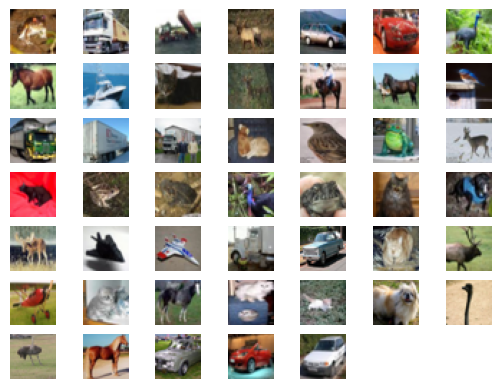

In [2]:
#load the image into memory
(trainX,trainy), (testX,testy) = load_data()
#plot images form the traing dataset

for i in range(47):
  #define subplot
  plt.subplot(7, 7, 1+i)
  #turn off axis
  plt.axis('off')
  #plot raw pixel data
  plt.imshow(trainX[i])
plt.show

In [3]:
print(trainX.shape)

(50000, 32, 32, 3)


In [4]:
#DEFINING DISCRIMINATOR MODEL

from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model
import numpy as np

In [5]:
#Disriminator model
def define_discriminator(in_shape=(32,32,3)):
  model = Sequential()
  #normal
  model.add(Conv2D(64,(3,3),padding='same',input_shape=in_shape))
  model.add(LeakyReLU(alpha=0.2))
  #downsample
  model.add(Conv2D(128,(3,3),strides=(2,2),padding="same"))
  model.add(LeakyReLU(alpha=0.2))
  #downsample
  model.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  #downsample
  model.add(Conv2D(256,(3,3),strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  #classifier
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))
  #compile model
  opt = Adam(learning_rate=0.0002,beta_1=0.5)
  model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
  return model


In [33]:
#define model
model = define_discriminator()
#summarize the model
model.summary()
#Plot the model
plot_model(model, to_file='discriminator_plot.png',show_shapes=True,show_layer_names=True)

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_40 (LeakyReLU)      │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_41 (LeakyReLU)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_42 (LeakyReLU)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_43 (LeakyReLU)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 522,497 (1.99 MB)

 Trainable params: 522,497 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [34]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [35]:
#Function to load the dataset and scale it
#load and prepare cifar10 training images

def load_real_samples():
  #load cifar10 dataset
  (trainX, _),(_, _) = load_data()
  #convert form unsigned ints to float
  X = trainX.astype('float32')
  #scale form [0,255] to [-1,1]
  X = (X-127.5) / 127.5
  return X

In [36]:
x_shape = load_real_samples()
x_shape.shape
x_shape[0]

array([[[-0.5372549 , -0.5137255 , -0.5058824 ],
        [-0.6627451 , -0.6392157 , -0.64705884],
        [-0.60784316, -0.62352943, -0.6627451 ],
        ...,
        [ 0.23921569,  0.03529412, -0.15294118],
        [ 0.19215687, -0.01960784, -0.2       ],
        [ 0.16078432, -0.02745098, -0.19215687]],

       [[-0.8745098 , -0.84313726, -0.84313726],
        [-1.        , -1.        , -1.        ],
        [-0.85882354, -0.9372549 , -1.        ],
        ...,
        [-0.03529412, -0.30980393, -0.5686275 ],
        [-0.06666667, -0.34901962, -0.60784316],
        [-0.04313726, -0.31764707, -0.5529412 ]],

       [[-0.8039216 , -0.8117647 , -0.8352941 ],
        [-0.8745098 , -0.94509804, -1.        ],
        [-0.6156863 , -0.7882353 , -0.9372549 ],
        ...,
        [-0.07450981, -0.34117648, -0.60784316],
        [-0.05882353, -0.34117648, -0.60784316],
        [-0.14509805, -0.42745098, -0.67058825]],

       ...,

       [[ 0.6313726 ,  0.33333334, -0.24705882],
        [ 0

In [7]:
#select half(64) form real samples
def generate_real_samples(dataset, n_samples):
  #choose random instances
  ix = np.random.randint(0, dataset.shape[0], n_samples)
  #retrieve selected images
  X = dataset[ix]
  #generate 'real' class labels(1)
  y = np.ones((n_samples, 1))
  return X, y

In [37]:
dataset = load_real_samples()

X_real,y_real = generate_real_samples(dataset, 64)
# plt.imshow(X_real[0])


In [9]:
#generate fake samples with class labels
def generate_fake_samples(n_samples):
  #generate uniform random numbers in [0,1]
  X = np.random.rand(32*32*3*n_samples)
  #update to have the range [-1,1]
  X = -1 + X * 2
  #reshape into a batch of color images
  X = X.reshape((n_samples, 32, 32, 3))
  #generate 'fake' class lables (0)
  y = np.zeros((n_samples, 1))
  return X,y

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


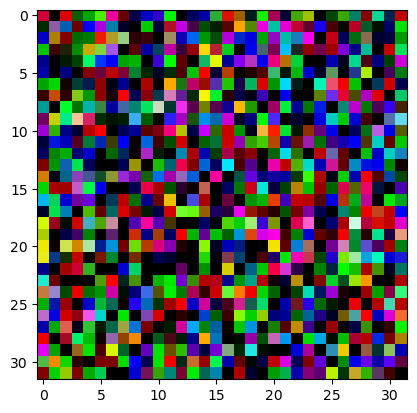

In [10]:
X_fake,y_fake = generate_fake_samples(64)
plt.imshow(X_fake[0])

In [11]:
print(X_fake.shape)
print(y_fake.shape)
print(y_fake)

(64, 32, 32, 3)
(64, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [12]:
#Train The Discriminator model temporaily
def train_discriminator(model, dataset, n_epochs=100, n_batch=128):
  half_batch = int(n_batch / 2)
  #manually enumerate epochs
  for i in range(n_epochs):
    #get randomly selected 'real' samples
    X_real1,y_real1 = generate_real_samples(dataset, half_batch)
    #update discriminator on real samples
    _, real_acc = model.train_on_batch(X_real1, y_real1)
    #generate 'fake' examples
    X_fake1, y_fake1 = generate_fake_samples(half_batch)
    #update discriminator on fake samples
    _, fake_acc = model.train_on_batch(X_fake, y_fake)
    #summarize performance
    print('>%d real=%.0f%% fake=%.0f%%' % (i+1,real_acc*100,fake_acc*100))


In [38]:
#Example Training

#define the discriminator model
model = define_discriminator()
#load image data
dataset = load_real_samples()
#fit the model
train_discriminator(model, dataset)

TypeError: generate_fake_samples() missing 2 required positional arguments: 'latent_dim' and 'n_samples'

In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model
from keras.optimizers import Adam

In [40]:
#define the GENERATOR MODEL
def define_generator(latent_dim):
  model = Sequential()
  # foundation for 4x4 image
  n_nodes = 256 * 4 * 4
  model.add(Dense(4096, input_dim = latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((4, 4, 256)))
  # unsample to 8x8
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # unsample to 16x16
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # unsample to 32x32
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2),padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  #output layer
  model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
  return model

In [41]:
# define size of latent space (NOISE)
latent_dim = 100
# define the generator model
model = define_generator(latent_dim)
#summarize the model
model.summary()
#plot the model
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names =True)

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 4096)           │       413,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_48 (LeakyReLU)      │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_12             │ (None, 8, 8, 128)      │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_49 (LeakyReLU)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_13             │ (None, 16, 16, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_50 (LeakyReLU)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_14             │ (None, 32, 32, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_51 (LeakyReLU)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 32, 32, 3)      │         3,459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,466,115 (5.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 0 (0.00 B)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [42]:
#generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
  #generate points in the latent space
  x_input = np.random.randn(latent_dim * n_samples)
  #reshape into a batch of inputs for the network
  x_input = x_input.reshape(n_samples, latent_dim)
  return x_input

In [43]:
x_input = generate_latent_points(100, 64)
print(x_input.shape)

(64, 100)


In [44]:
#use the generator to generate n fake samples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
  #generate points in latent space
  x_input = generate_latent_points(latent_dim, n_samples)
  #predict outputs
  X = g_model.predict(x_input)
  #create 'fake' class labels (0)
  y = np.zeros((n_samples, 1))
  return X, y

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


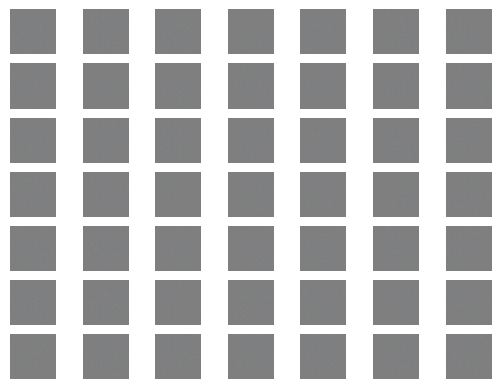

In [45]:
#size of latent space
latent_dim = 100
#define the generator model
model = define_generator(latent_dim)
#generate samples
n_samples = 49
X, _ = generate_fake_samples(model, latent_dim, n_samples)
#scale pixel values from [-1,1] to [0,1]
X = (X+1) / 2.0
#Plot the generated samples
for i in range(n_samples):
  #define subplot
  plt.subplot(7, 7 , 1+i)
  #turn off axis labels
  plt.axis('off')
  #plot single image
  plt.imshow(X[i])
#show the figure
plt.show()

In [46]:
#define the combines generator and discriminator model, for updating the genertor
def define_gan(g_model, d_model):
  #make weights in the discriminator not trainable
  d_model.trainable = False
  #connect them
  model = Sequential()
  #add generator
  model.add(g_model)
  #add the discriminator
  model.add(d_model)
  #comiple model
  opt = Adam(learning_rate=0.0002, beta_1 = 0.5)
  model.compile(loss='binary_crossentropy', optimizer = opt)
  return model

In [47]:
#size of the latent space
latent_dim = 100
#create the discriminator
d_model = define_discriminator()
#create the generator
g_model = define_generator(latent_dim)
#create the gan
gan_model = define_gan(g_model, d_model)
#summarize gan model
gan_model.summary()
#plot GAN MODEL
plot_model(gan_model,to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_17 (Sequential)      │ ?                      │     1,466,115 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_16 (Sequential)      │ ?                      │       522,497 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,988,612 (7.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 522,497 (1.99 MB)

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [48]:
#train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=200, n_batch=128):
  batch_per_epoch = int(dataset.shape[0] / n_batch)
  half_batch = int(n_batch / 2)
  #manually enumerate epcohs
  for i in range(n_epochs):
    #enumerate batches over the training set
    for j in range(batch_per_epoch):
      #get randomly selected 'real' samples
      X_real, y_real = generate_real_samples(dataset, half_batch)
      #update discriminator model weights
      d_loss1, _ = d_model.train_on_batch(X_real, y_real)
      #generate 'fake' examples
      X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
      #update discriminator model weights
      d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
      #prepare points in latent space as input as input for the generator
      X_gan = generate_latent_points(latent_dim, n_batch)
      #create inverted labels for the fake samples
      y_gan = generate_latent_points(latent_dim, n_batch)
      #create inverted labels for the fake samples
      y_gan = np.ones((n_batch, 1))
      #update the generator via the discriminator's error
      g_loss = gan_model.train_on_batch(X_gan, y_gan)
      #summarize loss on this batch
      print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f'%
            (i+1, j+1, batch_per_epoch, d_loss1, d_loss2, g_loss))
      #evalute the model performance, sometimes
      if (i+1) % 10 == 2:
        summarize_performance(i, g_model, d_model, dataset, latent_dim)


In [49]:
#evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):
  #prepare real samples
  X_real, y_real = generate_real_samples(dataset, n_samples)
  #evaluate discriminator on real examples
  _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
  #prepare fake examples
  x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
  #evaluate discriminator performane
  _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
  #evaluate discriminator performane
  print('>Accuracy real: %0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
  #save plot
  save_plot(x_fake, epoch)
  #save the generator model h5 file
  filename = 'generatar_model%03d.h5' % (epoch+1)
  g_model.save(filename)

In [50]:
#create and save a plot of generated images
def save_plot(examples, epoch, n=7):
  #scale form [-1,1] to [0,1]
  examples = (examples + 1) / 2.0
  #plot images
  for i in range(n * n):
    #define subplot
    plt.subplot(n, n, 1+i)
    #turn off axis
    plt.axis('off')
    #plot raw pixel data
    plt.imshow(examples[i])
  #save plot to file
  filename = 'generated_plot_e%03d.png' % (epoch+1)
  plt.savefig(filename)
  plt.close()

In [51]:
train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=200, n_batch=128)

c:\Users\HP\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py:74: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step 
>1, 1/390, d1=0.693, d2=0.693 g=0.693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
>1, 2/390, d1=0.694, d2=0.694 g=0.693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
>1, 3/390, d1=0.695, d2=0.695 g=0.693
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
>1, 4/390, d1=0.697, d2=0.697 g=0.692
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
>1, 5/390, d1=0.697, d2=0.697 g=0.691
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
>1, 6/390, d1=0.697, d2=0.698 g=0.690
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
>1, 7/390, d1=0.698, d2=0.699 g=0.689
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
>1, 8/390, d1=0.699, d2=0.700 g=0.687
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
>1, 9/390, d1=0.700, d2=0.701 g=0.684
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
>1, 10/390, d1=0.701, d2=0.703 g=0.681
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 289ms/step
>1, 11/390, d1=0.703, d2=0.706 g=0.676
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>1, 12/390, d1=0.706, d2=0.709 g=0.670
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
>1, 13/390, d1=0.709, d2=0.713 g=0.664
2/2 ━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
>2, 2/390, d1=1.336, d2=1.355 g=0.318
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
>Accuracy real: 34.666666%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
>2, 3/390, d1=1.341, d2=1.360 g=0.318
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
>Accuracy real: 41.333333%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
>2, 4/390, d1=1.337, d2=1.357 g=0.318
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
>Accuracy real: 29.333332%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
>2, 5/390, d1=1.340, d2=1.358 g=0.318
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
>Accuracy real: 27.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
>2, 6/390, d1=1.342, d2=1.362 g=0.317
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
>Accuracy real: 36.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
>2, 7/390, d1=1.337, d2=1.354 g=0.317
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
>Accuracy real: 36.666667%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
>2, 8/390, d1=1.338, d2=1.356 g=0.317
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
>Accuracy real: 34.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
>2, 9/390, d1=1.337, d2=1.355 g=0.317
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
>Accuracy real: 31.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
>2, 10/390, d1=1.342, d2=1.357 g=0.317
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
>Accuracy real: 19.333333%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
>2, 11/390, d1=1.341, d2=1.358 g=0.317
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
>Accuracy real: 34.666666%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
>2, 12/390, d1=1.343, d2=1.363 g=0.317
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
>Accuracy real: 30.666667%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
>2, 13/390, d1=1.343, d2=1.363 g=0.316
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
>Accuracy real: 29.333332%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
>2, 14/390, d1=1.345, d2=1.364 g=0.316
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
>Accuracy real: 30.666667%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
>2, 15/390, d1=1.345, d2=1.363 g=0.316
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
>Accuracy real: 33.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
>2, 16/390, d1=1.342, d2=1.362 g=0.316
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
>Accuracy real: 31.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
>2, 17/390, d1=1.339, d2=1.356 g=0.316
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
>Accuracy real: 36.666667%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
>2, 18/390, d1=1.337, d2=1.356 g=0.316
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
>Accuracy real: 30.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
>2, 19/390, d1=1.342, d2=1.362 g=0.316
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
>Accuracy real: 31.333333%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
>2, 20/390, d1=1.344, d2=1.363 g=0.316
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
>Accuracy real: 25.333333%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
>2, 21/390, d1=1.345, d2=1.365 g=0.315
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
>Accuracy real: 23.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>2, 22/390, d1=1.342, d2=1.360 g=0.315
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 33.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
>2, 23/390, d1=1.345, d2=1.365 g=0.315
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>Accuracy real: 31.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
>2, 24/390, d1=1.343, d2=1.362 g=0.315
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
>Accuracy real: 25.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
>2, 25/390, d1=1.346, d2=1.364 g=0.315
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>Accuracy real: 24.666667%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>2, 26/390, d1=1.346, d2=1.366 g=0.315
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
>Accuracy real: 34.666666%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
>2, 27/390, d1=1.343, d2=1.362 g=0.315
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>Accuracy real: 28.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>2, 28/390, d1=1.342, d2=1.361 g=0.315
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
>Accuracy real: 34.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>2, 29/390, d1=1.342, d2=1.359 g=0.314
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>Accuracy real: 36.666667%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
>2, 30/390, d1=1.337, d2=1.356 g=0.314
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 32.666665%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
>2, 31/390, d1=1.344, d2=1.362 g=0.314
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>Accuracy real: 28.666666%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
>2, 32/390, d1=1.345, d2=1.362 g=0.314
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
>Accuracy real: 31.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
>2, 33/390, d1=1.345, d2=1.363 g=0.314
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
>Accuracy real: 31.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
>2, 34/390, d1=1.346, d2=1.365 g=0.314
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>Accuracy real: 31.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
>2, 35/390, d1=1.345, d2=1.365 g=0.314
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
>Accuracy real: 36.666667%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
>2, 36/390, d1=1.346, d2=1.367 g=0.314
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
>Accuracy real: 31.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>2, 37/390, d1=1.345, d2=1.361 g=0.313
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>Accuracy real: 27.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
>2, 38/390, d1=1.348, d2=1.368 g=0.313
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 28.666666%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
>2, 39/390, d1=1.345, d2=1.365 g=0.313
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
>Accuracy real: 31.333333%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
>2, 40/390, d1=1.348, d2=1.367 g=0.313
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
>Accuracy real: 31.333333%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
>2, 41/390, d1=1.348, d2=1.365 g=0.313
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
>Accuracy real: 28.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
>2, 42/390, d1=1.349, d2=1.368 g=0.313
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
>Accuracy real: 34.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
>2, 43/390, d1=1.347, d2=1.366 g=0.313
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
>Accuracy real: 38.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
>2, 44/390, d1=1.347, d2=1.364 g=0.313
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
>Accuracy real: 27.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
>2, 45/390, d1=1.349, d2=1.367 g=0.312
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
>Accuracy real: 34.666666%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>2, 46/390, d1=1.350, d2=1.369 g=0.312
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
>Accuracy real: 30.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
>2, 47/390, d1=1.350, d2=1.370 g=0.312
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
>Accuracy real: 32.666665%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
>2, 48/390, d1=1.347, d2=1.366 g=0.312
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>Accuracy real: 31.333333%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
>2, 49/390, d1=1.348, d2=1.367 g=0.312
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
>Accuracy real: 28.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>2, 50/390, d1=1.348, d2=1.368 g=0.312
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
>Accuracy real: 32.666665%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
>2, 51/390, d1=1.347, d2=1.365 g=0.312
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
>Accuracy real: 26.666668%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
>2, 52/390, d1=1.344, d2=1.362 g=0.312
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 29.333332%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
>2, 53/390, d1=1.343, d2=1.362 g=0.312
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
>Accuracy real: 25.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
>2, 54/390, d1=1.348, d2=1.365 g=0.311
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
>Accuracy real: 23.333333%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>2, 55/390, d1=1.349, d2=1.370 g=0.311
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
>Accuracy real: 32.666665%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
>2, 56/390, d1=1.347, d2=1.364 g=0.311
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 36.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>2, 57/390, d1=1.348, d2=1.368 g=0.311
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>Accuracy real: 32.666665%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
>2, 58/390, d1=1.345, d2=1.364 g=0.311
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
>Accuracy real: 33.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>2, 59/390, d1=1.346, d2=1.367 g=0.311
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
>Accuracy real: 35.333332%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
>2, 60/390, d1=1.348, d2=1.367 g=0.311
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>Accuracy real: 25.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>2, 61/390, d1=1.350, d2=1.369 g=0.311
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
>Accuracy real: 31.333333%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
>2, 62/390, d1=1.345, d2=1.364 g=0.310
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 32.666665%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
>2, 63/390, d1=1.348, d2=1.368 g=0.310
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>Accuracy real: 36.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
>2, 64/390, d1=1.350, d2=1.369 g=0.310
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
>Accuracy real: 30.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
>2, 65/390, d1=1.350, d2=1.368 g=0.310
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>Accuracy real: 36.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>2, 66/390, d1=1.349, d2=1.367 g=0.310
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
>Accuracy real: 31.333333%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>2, 67/390, d1=1.350, d2=1.369 g=0.310
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 37.333333%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
>2, 68/390, d1=1.351, d2=1.368 g=0.310
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>Accuracy real: 34.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>2, 69/390, d1=1.350, d2=1.370 g=0.310
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
>Accuracy real: 34.666666%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
>2, 70/390, d1=1.347, d2=1.366 g=0.310
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
>Accuracy real: 29.333332%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>2, 71/390, d1=1.350, d2=1.366 g=0.309
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
>Accuracy real: 27.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>2, 72/390, d1=1.348, d2=1.366 g=0.309
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
>Accuracy real: 30.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>2, 73/390, d1=1.347, d2=1.366 g=0.309
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
>Accuracy real: 31.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>2, 74/390, d1=1.346, d2=1.365 g=0.309
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
>Accuracy real: 30.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>2, 75/390, d1=1.348, d2=1.367 g=0.309
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
>Accuracy real: 38.666666%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>2, 76/390, d1=1.348, d2=1.365 g=0.309
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
>Accuracy real: 29.333332%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>2, 77/390, d1=1.352, d2=1.369 g=0.309
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
>Accuracy real: 35.333332%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>2, 78/390, d1=1.351, d2=1.370 g=0.309
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
>Accuracy real: 28.666666%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
>2, 79/390, d1=1.348, d2=1.365 g=0.309
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
>Accuracy real: 25.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
>2, 80/390, d1=1.352, d2=1.371 g=0.309
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
>Accuracy real: 29.333332%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
>2, 81/390, d1=1.350, d2=1.370 g=0.308
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
>Accuracy real: 23.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>2, 82/390, d1=1.351, d2=1.369 g=0.308
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
>Accuracy real: 30.666667%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>2, 83/390, d1=1.352, d2=1.371 g=0.308
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 36.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>2, 84/390, d1=1.347, d2=1.363 g=0.308
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
>Accuracy real: 28.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>2, 85/390, d1=1.348, d2=1.367 g=0.308
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
>Accuracy real: 28.666666%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
>2, 86/390, d1=1.349, d2=1.368 g=0.308
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
>Accuracy real: 32.666665%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
>2, 87/390, d1=1.353, d2=1.372 g=0.308
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
>Accuracy real: 34.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
>2, 88/390, d1=1.354, d2=1.373 g=0.308
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 33.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
>2, 89/390, d1=1.354, d2=1.371 g=0.308
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
>Accuracy real: 25.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>2, 90/390, d1=1.355, d2=1.372 g=0.307
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>Accuracy real: 26.666668%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
>2, 91/390, d1=1.351, d2=1.369 g=0.307
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
>Accuracy real: 34.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
>2, 92/390, d1=1.350, d2=1.367 g=0.307
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
>Accuracy real: 28.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
>2, 93/390, d1=1.353, d2=1.371 g=0.307
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
>Accuracy real: 36.666667%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
>2, 94/390, d1=1.353, d2=1.373 g=0.307
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
>Accuracy real: 32.666665%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>2, 95/390, d1=1.350, d2=1.369 g=0.307
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
>Accuracy real: 40.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
>2, 96/390, d1=1.355, d2=1.372 g=0.307
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
>Accuracy real: 32.666665%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
>2, 97/390, d1=1.356, d2=1.374 g=0.307
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
>Accuracy real: 30.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
>2, 98/390, d1=1.353, d2=1.375 g=0.307
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
>Accuracy real: 33.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>2, 99/390, d1=1.354, d2=1.374 g=0.307
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
>Accuracy real: 30.666667%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
>2, 100/390, d1=1.357, d2=1.376 g=0.306
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
>Accuracy real: 30.666667%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
>2, 101/390, d1=1.354, d2=1.372 g=0.306
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
>Accuracy real: 31.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
>2, 102/390, d1=1.356, d2=1.375 g=0.306
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
>Accuracy real: 29.333332%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>2, 103/390, d1=1.354, d2=1.371 g=0.306
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
>Accuracy real: 25.333333%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
>2, 104/390, d1=1.353, d2=1.371 g=0.306
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
>Accuracy real: 28.666666%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
>2, 105/390, d1=1.356, d2=1.375 g=0.306
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 28.666666%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>2, 106/390, d1=1.355, d2=1.375 g=0.306
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
>Accuracy real: 26.666668%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
>2, 107/390, d1=1.355, d2=1.373 g=0.306
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
>Accuracy real: 27.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
>2, 108/390, d1=1.355, d2=1.374 g=0.306
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
>Accuracy real: 23.333333%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
>2, 109/390, d1=1.356, d2=1.377 g=0.306
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>Accuracy real: 34.666666%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
>2, 110/390, d1=1.357, d2=1.377 g=0.305
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 25.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>2, 111/390, d1=1.357, d2=1.378 g=0.305
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
>Accuracy real: 31.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>2, 112/390, d1=1.353, d2=1.373 g=0.305
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
>Accuracy real: 31.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>2, 113/390, d1=1.354, d2=1.374 g=0.305
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 32.666665%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
>2, 114/390, d1=1.356, d2=1.376 g=0.305
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
>Accuracy real: 32.666665%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
>2, 115/390, d1=1.357, d2=1.375 g=0.305
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
>Accuracy real: 33.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
>2, 116/390, d1=1.357, d2=1.375 g=0.305
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
>Accuracy real: 34.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
>2, 117/390, d1=1.356, d2=1.375 g=0.305
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 34.666666%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
>2, 118/390, d1=1.359, d2=1.379 g=0.305
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
>Accuracy real: 27.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
>2, 119/390, d1=1.359, d2=1.378 g=0.305
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 25.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
>2, 120/390, d1=1.358, d2=1.377 g=0.305
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>Accuracy real: 22.666667%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
>2, 121/390, d1=1.360, d2=1.380 g=0.304
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 31.333333%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
>2, 122/390, d1=1.359, d2=1.378 g=0.304
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>Accuracy real: 25.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
>2, 123/390, d1=1.359, d2=1.380 g=0.304
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>Accuracy real: 34.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
>2, 124/390, d1=1.356, d2=1.373 g=0.304
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 25.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
>2, 125/390, d1=1.358, d2=1.375 g=0.304
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
>Accuracy real: 28.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
>2, 126/390, d1=1.358, d2=1.378 g=0.304
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
>Accuracy real: 35.333332%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
>2, 127/390, d1=1.355, d2=1.375 g=0.304
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>Accuracy real: 30.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>2, 128/390, d1=1.358, d2=1.377 g=0.304
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 36.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>2, 129/390, d1=1.362, d2=1.382 g=0.304
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
>Accuracy real: 44.666666%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
>2, 130/390, d1=1.360, d2=1.379 g=0.304
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>Accuracy real: 22.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
>2, 131/390, d1=1.359, d2=1.379 g=0.303
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>Accuracy real: 27.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
>2, 132/390, d1=1.362, d2=1.381 g=0.303
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>Accuracy real: 29.333332%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
>2, 133/390, d1=1.360, d2=1.379 g=0.303
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
>Accuracy real: 28.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
>2, 134/390, d1=1.360, d2=1.379 g=0.303
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
>Accuracy real: 24.666667%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
>2, 135/390, d1=1.362, d2=1.379 g=0.303
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
>Accuracy real: 27.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
>2, 136/390, d1=1.360, d2=1.378 g=0.303
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>Accuracy real: 30.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
>2, 137/390, d1=1.360, d2=1.380 g=0.303
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 30.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
>2, 138/390, d1=1.361, d2=1.381 g=0.303
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
>Accuracy real: 34.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
>2, 139/390, d1=1.360, d2=1.382 g=0.303
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 33.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
>2, 140/390, d1=1.362, d2=1.382 g=0.303
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 37.333333%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
>2, 141/390, d1=1.361, d2=1.381 g=0.303
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 26.666668%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
>2, 142/390, d1=1.364, d2=1.381 g=0.302
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>Accuracy real: 34.666666%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>2, 143/390, d1=1.364, d2=1.383 g=0.302
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>Accuracy real: 34.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
>2, 144/390, d1=1.362, d2=1.380 g=0.302
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 27.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
>2, 145/390, d1=1.364, d2=1.382 g=0.302
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
>Accuracy real: 28.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
>2, 146/390, d1=1.362, d2=1.381 g=0.302
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
>Accuracy real: 23.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
>2, 147/390, d1=1.364, d2=1.385 g=0.302
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
>Accuracy real: 34.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
>2, 148/390, d1=1.365, d2=1.383 g=0.302
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
>Accuracy real: 25.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
>2, 149/390, d1=1.365, d2=1.386 g=0.302
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
>Accuracy real: 30.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
>2, 150/390, d1=1.366, d2=1.384 g=0.302
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>Accuracy real: 25.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>2, 151/390, d1=1.363, d2=1.385 g=0.302
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>Accuracy real: 30.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
>2, 152/390, d1=1.363, d2=1.382 g=0.302
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 28.666666%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
>2, 153/390, d1=1.361, d2=1.383 g=0.302
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>Accuracy real: 27.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>2, 154/390, d1=1.361, d2=1.381 g=0.301
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
>Accuracy real: 28.666666%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
>2, 155/390, d1=1.362, d2=1.380 g=0.301
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
>Accuracy real: 22.666667%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
>2, 156/390, d1=1.366, d2=1.384 g=0.301
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 31.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
>2, 157/390, d1=1.368, d2=1.386 g=0.301
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 31.333333%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
>2, 158/390, d1=1.365, d2=1.384 g=0.301
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
>Accuracy real: 25.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
>2, 159/390, d1=1.368, d2=1.387 g=0.301
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>Accuracy real: 36.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
>2, 160/390, d1=1.364, d2=1.382 g=0.301
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
>Accuracy real: 36.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
>2, 161/390, d1=1.369, d2=1.387 g=0.301
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
>Accuracy real: 24.666667%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>2, 162/390, d1=1.369, d2=1.387 g=0.301
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>Accuracy real: 37.333333%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
>2, 163/390, d1=1.369, d2=1.388 g=0.301
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
>Accuracy real: 26.666668%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
>2, 164/390, d1=1.369, d2=1.388 g=0.301
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>Accuracy real: 32.666665%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
>2, 165/390, d1=1.370, d2=1.389 g=0.300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
>Accuracy real: 25.333333%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
>2, 166/390, d1=1.369, d2=1.390 g=0.300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
>Accuracy real: 35.333332%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>2, 167/390, d1=1.368, d2=1.390 g=0.300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
>Accuracy real: 27.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
>2, 168/390, d1=1.368, d2=1.389 g=0.300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 29.333332%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>2, 169/390, d1=1.368, d2=1.387 g=0.300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
>Accuracy real: 30.666667%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
>2, 170/390, d1=1.367, d2=1.386 g=0.300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>Accuracy real: 30.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
>2, 171/390, d1=1.371, d2=1.392 g=0.300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
>Accuracy real: 32.666665%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>2, 172/390, d1=1.370, d2=1.389 g=0.300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>Accuracy real: 24.666667%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
>2, 173/390, d1=1.371, d2=1.390 g=0.300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>Accuracy real: 33.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
>2, 174/390, d1=1.371, d2=1.394 g=0.300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
>Accuracy real: 34.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
>2, 175/390, d1=1.372, d2=1.391 g=0.300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>Accuracy real: 27.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
>2, 176/390, d1=1.372, d2=1.391 g=0.300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
>Accuracy real: 28.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
>2, 177/390, d1=1.374, d2=1.393 g=0.299
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 29.333332%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
>2, 178/390, d1=1.373, d2=1.392 g=0.299
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
>Accuracy real: 30.666667%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
>2, 179/390, d1=1.370, d2=1.388 g=0.299
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>Accuracy real: 34.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
>2, 180/390, d1=1.362, d2=1.380 g=0.299
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
>Accuracy real: 30.666667%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
>2, 181/390, d1=1.366, d2=1.384 g=0.299
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>Accuracy real: 25.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
>2, 182/390, d1=1.371, d2=1.393 g=0.299
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 30.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
>2, 183/390, d1=1.370, d2=1.389 g=0.299
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
>Accuracy real: 33.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
>2, 184/390, d1=1.371, d2=1.390 g=0.299
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 35.333332%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
>2, 185/390, d1=1.374, d2=1.394 g=0.299
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>Accuracy real: 28.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
>2, 186/390, d1=1.372, d2=1.392 g=0.299
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>Accuracy real: 33.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
>2, 187/390, d1=1.375, d2=1.392 g=0.299
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 22.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
>2, 188/390, d1=1.375, d2=1.394 g=0.299
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>Accuracy real: 28.666666%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
>2, 189/390, d1=1.372, d2=1.390 g=0.298
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
>Accuracy real: 34.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
>2, 190/390, d1=1.373, d2=1.392 g=0.298
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
>Accuracy real: 32.666665%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
>2, 191/390, d1=1.373, d2=1.394 g=0.298
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>Accuracy real: 32.666665%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
>2, 192/390, d1=1.371, d2=1.390 g=0.298
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 30.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
>2, 193/390, d1=1.375, d2=1.394 g=0.298
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>Accuracy real: 33.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
>2, 194/390, d1=1.375, d2=1.397 g=0.298
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>Accuracy real: 31.333333%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
>2, 195/390, d1=1.373, d2=1.392 g=0.298
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
>Accuracy real: 35.333332%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
>2, 196/390, d1=1.373, d2=1.393 g=0.298
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>Accuracy real: 28.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
>2, 197/390, d1=1.375, d2=1.395 g=0.298
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
>Accuracy real: 25.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>2, 198/390, d1=1.375, d2=1.394 g=0.298
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>Accuracy real: 27.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
>2, 199/390, d1=1.374, d2=1.391 g=0.298
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
>Accuracy real: 30.666667%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
>2, 200/390, d1=1.371, d2=1.389 g=0.298
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
>Accuracy real: 27.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
>2, 201/390, d1=1.375, d2=1.394 g=0.297
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
>Accuracy real: 33.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
>2, 202/390, d1=1.378, d2=1.395 g=0.297
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>Accuracy real: 27.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
>2, 203/390, d1=1.376, d2=1.392 g=0.297
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
>Accuracy real: 36.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
>2, 204/390, d1=1.371, d2=1.391 g=0.297
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>Accuracy real: 27.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
>2, 205/390, d1=1.372, d2=1.394 g=0.297
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>Accuracy real: 34.666666%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
>2, 206/390, d1=1.378, d2=1.398 g=0.297
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>Accuracy real: 30.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
>2, 207/390, d1=1.376, d2=1.394 g=0.297
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>Accuracy real: 32.666665%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
>2, 208/390, d1=1.375, d2=1.394 g=0.297
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
>Accuracy real: 29.333332%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
>2, 209/390, d1=1.374, d2=1.392 g=0.297
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>Accuracy real: 30.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
>2, 210/390, d1=1.374, d2=1.391 g=0.297
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>Accuracy real: 28.000000%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
>2, 211/390, d1=1.379, d2=1.399 g=0.297
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
>Accuracy real: 30.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
>2, 212/390, d1=1.380, d2=1.399 g=0.297
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
>Accuracy real: 26.666668%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
>2, 213/390, d1=1.379, d2=1.397 g=0.297
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
>Accuracy real: 32.666665%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
>2, 214/390, d1=1.379, d2=1.399 g=0.296
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
>Accuracy real: 30.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
>2, 215/390, d1=1.377, d2=1.396 g=0.296
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
>Accuracy real: 29.333332%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
>2, 216/390, d1=1.378, d2=1.396 g=0.296
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>Accuracy real: 30.666667%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
>2, 217/390, d1=1.379, d2=1.398 g=0.296
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
>Accuracy real: 30.000001%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
>2, 218/390, d1=1.379, d2=1.400 g=0.296
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
>Accuracy real: 33.333334%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
>2, 219/390, d1=1.380, d2=1.398 g=0.296
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
>Accuracy real: 31.999999%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
>2, 220/390, d1=1.380, d2=1.401 g=0.296
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>Accuracy real: 26.666668%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
>2, 221/390, d1=1.380, d2=1.401 g=0.296
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>Accuracy real: 36.666667%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
>2, 222/390, d1=1.380, d2=1.399 g=0.296
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>Accuracy real: 30.666667%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
>2, 223/390, d1=1.381, d2=1.401 g=0.296
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
>Accuracy real: 38.666666%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
>2, 224/390, d1=1.378, d2=1.398 g=0.296
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
>Accuracy real: 35.333332%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
>2, 225/390, d1=1.377, d2=1.397 g=0.296
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
>Accuracy real: 26.666668%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
>2, 226/390, d1=1.377, d2=1.398 g=0.296
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
>Accuracy real: 26.666668%, fake: 0%


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
